<a href="https://colab.research.google.com/github/chisomobanja/metadata-classification/blob/main/metadata_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## 1.1 Problem statement
Many articles published in UNZA journals have incomplete or inconsistent descriptive metadata (e.g., missing author names, publication dates, keywords, abstracts). This makes it difficult for researchers or librarians to correctly cite articles. We need a way to automatically classify the completeness of metadata associated with each article, so we can identify gaps and improve metadata quality.

##1.2 Business Objectives


 1. Automate Metadata Completeness Classification.

 2. Diagnose Metadata Gaps Across UNZA journels.

 3. improve Citation Accuracy and Research Discoverability.

 4. Standaridise Metadata Practices.

 5. Establish Sustainable Metadata Governance.


### 1.2.1 What success might look like in real life :

  - Metadata Completeness where each article recieves a scored ranging from 0% to 100% based on the presence of key metadata.

  - Reduction in Incomplete Records where number of articles with missing metadata drops by a good percentage like 70%.


- Improved Citation Quality where there is a great reduction in citation errors by researchers and librarians.

- Metadata validation reduces manual correction workload by a great percentage.

- Metadata audits and contributor training are institutionalised in various departments.

## 1.3 Translating business objectives into data mining goals
To achieve the above business objectives, our project will focus on developing a robust classification model capable of automatically evaluating the completeness of descriptive metadata for articles in UNZA journals. Specifically:
- Build a supervised classification model that categorizes articles into defined completeness levels — for example:

  -Complete (all required metadata fields present),

  -Partially Complete (some key fields missing),

  -Incomplete (major fields missing).
- Train and validate the model using historical article metadata records, where completeness has been manually assessed, ensuring the model can generalize to new, unseen records.
- Leverage appropriate features from metadata fields such as title, author(s), publication date, keywords, abstract, DOI, and journal name to determine the completeness score/class.
- Enable metadata quality insights by aggregating classification results to identify common gaps across journals, which will guide targeted improvements and policy enforcement.
- Set measurable model performance targets — e.g., at least 85% classification accuracy for predicting completeness categories on test data.

## 1.4 Initial Project Success Criteria
We’ll know our project is successful when we can clearly see improvements in both the quality of metadata and the ease of managing it. Specifically:

1. ### Accurate classifications
   Our model should correctly predict whether an article’s metadata is complete, partially complete, or incomplete at least 85% of the time. It should also be especially reliable in spotting incomplete records, with precision and recall above 80%.

2. ### Trustworthy completeness scores
   When we compare the system’s completeness scores to manual librarian checks, the difference should be very small ideally less than 5%.

3. ### Noticeable improvement in records  
   Within a period of time, the number of articles with missing or incomplete metadata should drop by at least half in the journals we focus on.

4. ### Smooth workflow integration  
   The tool should fit into the existing UNZA journal processes without slowing things down, allowing continuous checks without extra hassle.

5. ### Positive user feedback  
   Librarians, editors, and contributors should find the tool easy to use and report that it saves them time and reduces the amount of manual fixing they have to do.


##1.5 Next Steps

To move forward, we will begin by collecting and preparing metadata samples from existing UNZA journal articles. This includes labelling records for completeness and identifying key metadata fields. We will then design and test initial classification models, refining them based on performance metrics. Parallel to model development, we’ll engage stakeholders (librarians, editors, contributors) to ensure the solution aligns with their workflows and needs. Once validated, the tool will be piloted on select journals before broader deployment.

# 2. Data Understanding


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
var_dataset = pd.read_csv('/content/drive/MyDrive/metadata-classification-shortcut/misc-unza25-csc4792-project_team7/Metadata_classification_dataset - Sheet1.csv')




Shape: (259, 11)


In [16]:
var_dataset.head()

,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
0,Politics of gender in sports administration an...,2021-06-30,Mbale G Tamela; Madalitso K Banja,JAE_001,This was a phenomenological study aimed at inv...,"Access to opportunities, gender, gender stereo...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
1,Distance education students’ experiences of in...,2021-06-30,Musonda Luchembe; Peter C Sampa; Daniel L Mpol...,JAE_002,Although informal learning is an important way...,"Informal learning, informal study group, inter...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
2,Social Cash Transfer mediating socio-economic ...,2021-06-30,Serah Kabamba; Collins C Kayangula; Noah K Sic...,JAE_003,The study aimed at investigating how community...,"Elderly, social inequality mediation, social c...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
3,Theatre for development: a creative strategy f...,2021-06-30,Brian Kombe; Emmy H Mbozi,JAE_004,This article is based on a study that sought t...,"Theatre for Development, community, Conscienti...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
4,"Youth and adult literacy in Zambia, alternativ...",2021-06-30,Choolwe Kang'ombe; Noah K Sichula,JAE_005,This qualitative exploratory article attempted...,"Adult literacy, adult literacy policy, curricu...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...


In [12]:
print(f"Shape: {var_dataset.shape}")

Shape: (259, 11)


In [14]:
print("DATASET OVERVIEW ") #Checking the names of the columns
print(f"Dataset Shape: {var_dataset.shape}")
print(f"Number of Rows: {var_dataset.shape[0]}")
print(f"Number of Columns: {var_dataset.shape[1]}")
print("\nColumn Names:")
for i, col in enumerate(var_dataset.columns, 1):
    print(f"{i}. {col}")

DATASET OVERVIEW 
Dataset Shape: (259, 11)
Number of Rows: 259
Number of Columns: 11

Column Names:
1. Title
2. Date Published
3. Authors
4. Article_ID
5. Abstract
6. Keywords
7. Journal
8. Issue
9. Volume
10. DOI
11. URL


In [17]:
var_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           259 non-null    object
 1   Date Published  258 non-null    object
 2   Authors         257 non-null    object
 3   Article_ID      259 non-null    object
 4   Abstract        257 non-null    object
 5   Keywords        240 non-null    object
 6   Journal         259 non-null    object
 7   Issue           259 non-null    int64 
 8   Volume          259 non-null    int64 
 9   DOI             52 non-null     object
 10  URL             259 non-null    object
dtypes: int64(2), object(9)
memory usage: 22.4+ KB


In [18]:
var_dataset.describe(include='all') #Descriptive statistics

,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
count,259,258,257,259,257,240,259,259.000000,259.000000,52,259
unique,257,94,252,259,257,240,14,NaN,NaN,52,259
top,EDITORIAL COMMENT,2023-08-09,Cheela Chilala,ZJOCI_025,In exploring agency and phenomenology in the f...,"Access to opportunities, gender, gender stereo...",Multidisciplinary Journal of Language and Soci...,NaN,NaN,https://doi.org/10.53974/unza.jabs.9.2.1399,https://journals.unza.zm/index.php/ZJOCI/artic...
freq,2,16,2,1,1,1,25,NaN,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.957529,6.841699,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.432651,7.289291,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,7.000000,NaN,NaN


In [19]:
print("DATA QUALITY ANALYSIS")
print("\n This is an analysis of missing values:")

missing_data = var_dataset.isnull().sum()
missing_percentage = (missing_data / len(var_dataset)) * 100

quality_df = pd.DataFrame({
    'Column': var_dataset.columns,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(quality_df.to_string(index=False))

DATA QUALITY ANALYSIS

 This is an analysis of missing values:
        Column  Missing_Count  Missing_Percentage
           DOI            207           79.922780
      Keywords             19            7.335907
       Authors              2            0.772201
      Abstract              2            0.772201
Date Published              1            0.386100
         Title              0            0.000000
    Article_ID              0            0.000000
       Journal              0            0.000000
         Issue              0            0.000000
        Volume              0            0.000000
           URL              0            0.000000


The dataset 259 academic articles with 11 columns including titles, abstracts, authors, and journal metadata. The missing data is mostly in the DOI's and Keywords with a few missing in 3 other categories. Other than that, the dataset does not have many many missing values.

In [ ]:
# Installing gdown to directly use a link
!pip install -q gdown
# I used -q gdown because the direct google drive was only working on my end but not woth other users.
# Each user would have had to put the dataset in a specific folder on their drive, so I opted to use a direct link to the file on google drive
import gdown
import pandas as pd

# File ID from the shared link
file_id = "1sErHRwqKS2O4wby5ocsrp2g4isWTGfzM"
url = f"https://drive.google.com/uc?id={file_id}"

#This downloads the csv to local storage
output = "db-unza25-csc4792-datasets-dspace_unza_zm.csv"
gdown.download(url, output, quiet=False)

# This reads the csv and assigns it to df
df = pd.read_csv(output, delimiter="|", engine="python")

Downloading...
From: https://drive.google.com/uc?id=1sErHRwqKS2O4wby5ocsrp2g4isWTGfzM
To: /content/db-unza25-csc4792-datasets-dspace_unza_zm.csv
100%|██████████| 4.75M/4.75M [00:00<00:00, 31.3MB/s]


In [ ]:
df.isnull().sum()


,0
_identifier,0
_datestamp,0
_setSpec,0
title,15
creator,24
subject,32
description,221
date,15
type,26
identifier,15


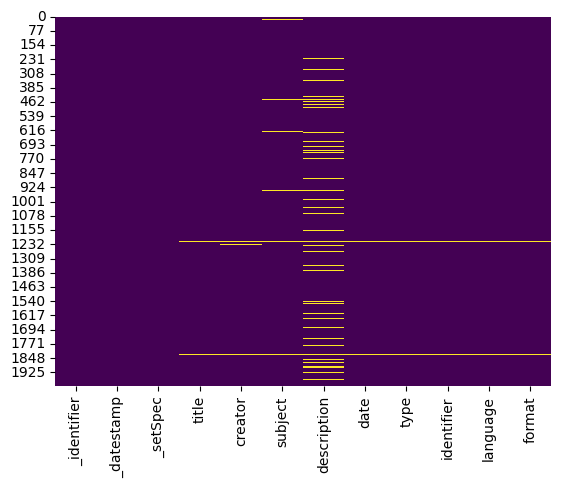

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()


Found it hard to directly acess the shared folder so I had to use a direct link to the folder and then access that. Used the | delimeter because that's what was used in the csv file.

##Below are the explorative operations on the data

In [ ]:
df.head(3)

,_identifier,_datestamp,_setSpec,title,creator,subject,description,date,type,identifier,language,format
0,oai:dspace.unza.zm:123456789/4153,2016-06-09T12:46:34Z,com_123456789_289=col_123456789_290,Morphological characterisation of low and high...,"Chinyundo, Anthony",Helianthus Annuus. L.=Sun flower oil=Cooking oil,Morphological characterization was done on thr...,2015-11-11T13:39:13Z=2015-11-11T13:39:13Z=2015...,Other,http://hdl.handle.net/123456789/4153,en,application/pdf
1,oai:dspace.unza.zm:123456789/3777,2016-06-09T10:16:03Z,com_123456789_18=col_123456789_76,Instruction based formative assessment in sele...,"Mwale, Fred M.",Educational tests and measurement=Formative As...,The purpose of the study was to evaluate the u...,2015-04-13T07:36:13Z=2015-04-13T07:36:13Z=2015...,Thesis,http://hdl.handle.net/123456789/3777,en,application/pdf=application/pdf=application/pd...
2,oai:dspace.unza.zm:123456789/4729,2017-07-26T01:01:14Z,com_123456789_18=col_123456789_76,An assessment of teachers' competences in care...,"Banda, Christopher","Counselling in Secondary Education-Solwezi, Za...",M.ED=The purpose of the study was to assess th...,2017-07-25T13:51:51Z=2017-07-25T13:51:51Z=2016,Thesis,http://dspace.unza.zm:8080/xmlui/handle/123456...,en,application/pdf


In [ ]:
df['description'].head(3)

,description
0,Morphological characterization was done on thr...
1,The purpose of the study was to evaluate the u...
2,M.ED=The purpose of the study was to assess th...


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

In [ ]:
df.tail(4)

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.index

In [ ]:
df.dtypes

In [ ]:
df.describe

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().mean()*100

In [ ]:
df.notnull()

In [ ]:
df.notnull().sum()

In [ ]:
df.dropna

In [ ]:
df.duplicated().sum()

In [ ]:
df.mean

In [ ]:
df.median

### Exploratory Data Analysis Summary

In exploring the dataset, I applied several Pandas commands to better understand its structure, quality, and key features.

- I began by using `df.shape`, `df.head` and `df.tail(4)` to see the overall size of the dataset and preview the first and last few records. This helped confirm that the data was loaded correctly.  
- The `df.dtypes` command revealed the data types of each column, while `df.describe()` provided summary statistics such as minimum, maximum, mean, and standard deviation for numerical fields. I also checked the central tendencies using `df.mean()` and `df.median()`.  
- To assess data quality, I used `df.isnull().sum()` and `df.isnull().mean()*100` to identify missing values and calculate their percentage. The complementary command `df.notnull().sum()` helped confirm how much complete data was available, while `df.dropna()` showed the effect of removing missing records.  
- I checked for duplicate entries with `df.duplicated().sum()`, which is important to avoid biased results during analysis.

### Interpretation of Findings

From these commands, I obtained a clearer picture of the dataset. The use of shape, data types, and descriptive statistics established the foundation of its structure. Missing value checks highlighted areas that might require cleaning or imputation, while duplicate detection ensured data consistency. Grouping and correlation analysis revealed patterns and potential associations between variables. Overall, this exploration step provided the necessary understanding of the dataset’s quality and characteristics before moving into more advanced analysis.


Below are the mathematical operations on the data

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [ ]:
# Installing gdown to directly use a link
!pip install -q gdown

import gdown
import pandas as pd

# File ID from the shared link
file_id = "1sErHRwqKS2O4wby5ocsrp2g4isWTGfzM"
url = f"https://drive.google.com/uc?id={file_id}"

#This downloads the csv to local storage
output = "db-unza25-csc4792-datasets-dspace_unza_zm.csv"
gdown.download(url, output, quiet=False)

# This reads the csv
df = pd.read_csv(output, delimiter="|", engine="python")

In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [ ]:
print("Numeric columns:", numeric_cols.tolist())

In [ ]:
categorical_cols = ['language', 'type', 'subject']

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(12,6))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Top categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.show()

In [ ]:

# # df['date'] = pd.to_datetime(df['date'], errors='coerce')

# # df['year'] = df['date'].dt.year

# # print(df[['date', 'year']].head())
# # Convert your datetime column to pandas datetime
# df['date'] = pd.to_datetime(df['date'], errors='coerce')

# # Extract year and date
# df['year'] = df['date'].dt.year           # Gets 2016
# df['date_only'] = df['date'].dt.date      # Gets 2016-06-09
# # print(df[['date', 'year']].head())

In [ ]:

plt.figure(figsize=(10,6))
df['creator'].value_counts().head(20).plot(kind='barh')

plt.title("Top 20 Creators")
plt.xlabel("Count")
plt.ylabel("Creator")
plt.gca().invert_yaxis()  # So the top creator appears at the top
plt.tight_layout()
plt.show()


In [ ]:
print(df['date'].head(20))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count occurrences of each format type
format_counts = df['format'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10,6))
format_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Records per Format Type")
plt.xlabel("Format")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Data Understanding

 The dataset contains 1,977 records and 111 fields, primarily text-based metadata from UNZA’s institutional repository. Almost all columns (110) are unstructured text, while one is numeric. The metadata is inconsistent: some fields contain long descriptive text, while others hold only single terms (e.g., “Science”, “Lusaka”). Several key fields such as title, creator, subject, and type can be leveraged as classification features or target labels.

 Many columns are extremely sparse, for instance, Unnamed: 78 through Unnamed: 110 are almost empty with 1,976 missing values each. Certain fields contain frequent repetition of keywords (e.g., “Lusaka”, “teachers”), while others consist of completely unique entries (such as the combined metadata column). The dataset also includes noisy tokens (“however”, “therefore”) that don’t contribute structured meaning.

 Overall, challenges for metadata classification include missing values, sparse attributes, high cardinality in key fields, mixed vocabularies, and non-standard formatting. These issues will require normalization, stopword removal, and preprocessing to make the data suitable for modeling.



#  3. Data Preparation

In this section, we clean, transform, and prepare our dataset for the modeling phase.  
The steps include handling missing values, correcting inconsistencies, creating new features, and transforming categorical variables.



In [ ]:
df.shape # printing the shape before cleaning

So it has 2000 rows and 12 columns

### 3.1 Data Cleaning

We begin by handling missing values, duplicates, and blank entries.  
Cleaning ensures that our dataset is consistent and reliable for analysis.



I used this command to see the shape before cleaning for analysis purposes.

In [ ]:
df.shape #The shape before cleaning



 We replaced blanks with `NaN` to standardize missing values. The missing values were then inspected to identify problematic fields. After that, we removed duplicate rows to prevent bias in the analysis. Then lastly, printed the shape before and after to show how much data was affected.

In [ ]:
# Replacing empty spaces with NaN
df = df.replace(r'^\s*$', pd.NA, regex=True)

# Finding the missing values per column
df.isnull().sum()

# Removing any duplicate rows
duplicates_count = df.duplicated().sum()
df = df.drop_duplicates()

print("Number of duplicates removed:", duplicates_count)
print("Shape after cleaning:", df.shape)



I checked the first 20 columns of the date column to see the format of the dates.

In [ ]:
df['date'].head(20)

 I did this to check the actual format of the date column as part of the data cleaning. The date column was first converted to string and split at the = character, with only the part after the last = being stored as date_clean. From this cleaned version, a 4-digit number representing the year was extracted using a regular expression and stored in the new year column, which was initially cast to a float type to safely handle missing or non-numeric values.
 I then beamed the first 10 rows of the original date, the cleaned date_clean, and the extracted year side by side to verify that the transformation worked as expected.

In [ ]:
# 2. Safe year extraction (works with your format: 2016-06-09T12:46:34Z)
df['year'] = df['date'].astype(str).str[:4]  # Gets first 4 characters (2016)
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert safely

# 3. Create decade
df['year'].head(3)




In the year column years were initially stored as a float. I converted this column to the Int64 type so that the years are represented as integers while still allowing NaN values to exist for missing or invalid entries.
After doing this, I beamed the first 10 rows of the original date, the cleaned date_clean, and the finalized year column together to confirm that the conversion preserved valid years and correctly handled missing values.

In [ ]:
df['year'] = df['year'].astype('Int64')  # keeps NaN but makes years integers

df[['date', 'year']].head(10) # we now beam the data frame to confirm


In [ ]:
df['decade'] = (df['year'] // 10) * 10
print(df[['year','decade']].tail(20))

In [ ]:
text_cols = ['title', 'creator', 'subject', 'description', 'type', 'language']
for col in text_cols:
    df[col] = df[col].fillna("Unknown") # Changing the fileds with NaN to uknown because i feel it will be easier to use info like that

In [ ]:
df.isnull().sum()


In [ ]:
#  Used this to normalize categorical values by making them lowercase and removing spaces
df['type'] = df['type'].str.lower().str.strip()
df['language'] = df['language'].str.lower().str.strip()
df.head(3)

In [ ]:
import re
df['title'] = df['title'].astype(str).str.strip()
df['description'] = df['description'].astype(str).str.replace(r"<.*?>", "", regex=True)
#Used this to remove extra spaces and strip out any possible html tags

In [ ]:
df['year'] = df['year'].apply(
    lambda x: x if pd.notna(x) and 1900 <= x <= 2025 else pd.NA
)#Using this to make sure the information is within the vaid years
#It will produce a Nan if you go beyond it

df.head(2)

### Data cleaning summary
I cleaned the dataset by first replacing empty spaces with NaN, removing duplicate rows, and then standardising missing values in textbased columns by filling them with “Unknown.”
The dates were processed to extract valid years, and I kept only those between 1900 and 2025, while invalid entries were set to NaN.
The text fields like type and language were normalized to lowercase and all extra spaces were removed.
The title was cleaned of leading spaces, and description had any tags and unnecessary whitespace removed.
After these steps, the data is consistent, free from duplicates, and ready for feature engineering with reliable year values and normalized text fields.

### 3.2 Feature Engineering

After cleaning the dataset, we created new features from existing ones to make the data more useful for modeling. This step helps the model learn better patterns by capturing hidden relationships and turning raw fields into more meaningful variables.


### Title and Description Length
The amount of text in titles or descriptions can be informative. We created two new features:
- title_length: number of words in the title
-word_count: for the title
- description_length: number of words in the description  
This can help in understanding how detailed a record is.

In [ ]:
df['title_length'] = df['title'].astype(str).apply(len)        # number of characters
df['word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))
df['description_length'] = df['description'].astype(str).apply(lambda x: len(x.split()))
df[['title', 'title_length', 'word_count','description_length']].head()

### Creating Decade from Year
Instead of using the exact year, we grouped publications into decades. This reduces noise and highlights trends over time (e.g., comparing 1990s vs. 2000s instead of each year separately).


In [ ]:
# Create decade variable (e.g., 1990–1999 → 1990s)
df['decade'] = (df['year'] // 10) * 10
df[['year', 'decade']].head(50)


In [ ]:
df['is_english'] = df['language'].apply(lambda x: 1 if x == 'english' else 1)
df[['language', 'is_english']].head(5)

In [ ]:
def categorize_type(x):
    x = str(x).lower()   # convert to string + lowercase
    if 'article' in x or 'report' in x or 'thesis' in x:
        return 'text'
    elif 'image' in x or 'dataset' in x:
        return 'non-text'
    else:
        return 'other'

df['type_group'] = df['type'].apply(categorize_type)
df[['type', 'type_group']].head(50)


In [ ]:
keywords = ['study', 'evaluate', 'characterization', 'categorization']

for kw in keywords:
    df[f'has_{kw}'] = df['description'].astype(str).str.contains(kw, case=False).astype(int)

df[['subject'] + [f'has_{kw}' for kw in keywords]].head(5)


3.3 Data Transformation


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
import numpy as np


In [ ]:
print(df.columns) #used this command to chck the column names

In [ ]:
# Convert 'date' column to datetime, extract year, and group into decades so that it will be easy to read the publication year.
df['decade'] = (df['year'] // 10) * 10
print(df[['year', 'decade']].head())

In [ ]:
#Handle missing values in key fields so that our data is consistent and clean
df['language'] = df['language'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')
df['format'] = df['format'].fillna('Unknown')
df['year'] = df['year'].fillna(df['year'].median())
df['subject'] = df['subject'].fillna('Unknown')
df['description'] = df['description'].fillna('')



In [ ]:
df.isnull().sum()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
# Initialize label encoders for categorical fields so that we can apply them i n our data frame
le_type = LabelEncoder()
le_lang = LabelEncoder()
le_format = LabelEncoder()


In [ ]:
# Apply label encoding to categorical variables and store as new encoded columns
df['type_encoded'] = le_type.fit_transform(df['type'].astype(str))
df['language_encoded'] = le_lang.fit_transform(df['language'].astype(str))
df['format_encoded'] = le_format.fit_transform(df['format'].astype(str))

In [ ]:
# Standardize numerical features so they have mean = 0 and standard deviation = 1 as we convert our categorial data
scaler = StandardScaler()
df[['title_length_scaled', 'word_count_scaled', 'description_length_scaled']] = scaler.fit_transform(
    df[['title_length', 'word_count', 'description_length']]
)


In [ ]:
# Limit to the top 500 features (most informative words)
tfidf = TfidfVectorizer(max_features=500)
X_title = tfidf.fit_transform(df['title'].astype(str))


In [ ]:
print("Shape of TF-IDF matrix:", X_title.shape)

Encoding

In [ ]:
# Define key metadata fields
key_metadata_fields = ['title', 'creator', 'subject', 'description', 'year', 'type', 'language', 'format']

# Calculate a completeness score for each row
# This is a simple approach: count how many key fields are not 'Unknown' or NaN
df['completeness_score'] = df[key_metadata_fields].apply(
    lambda row: sum([1 for field in key_metadata_fields if pd.notna(row[field]) and row[field] != 'Unknown']),
    axis=1
)
# Define a threshold for completeness (allowing up to 2 missing fields)
completeness_threshold = len(key_metadata_fields) - 2

 #Mark records as complete (1) if they exceed the threshold, else incomplete (0)
df['is_complete'] = (df['completeness_score'] > completeness_threshold).astype(int)

# Encode completeness (0/1) using LabelEncoder for consistency with other categorical encodings
le_completeness = LabelEncoder()
df['completeness_encoded'] = le_completeness.fit_transform(df['is_complete'])

print(df[['completeness_score', 'is_complete', 'completeness_encoded']].head())

# 3.4 Data Preparation Summary


# 1. Data Cleaning

## Standardize missing values

df = df.replace(r'^\s*$', pd.NA, regex=True)

Note: Standardizes missing values so they are recognized as NaN.


## Remove duplicates
df = df.drop_duplicates()

Note: Ensures no record is counted twice, avoiding bias.


## Fill text fields with 'Unknown'
text_cols = ['title','creator','subject','description','type','language']
for col in text_cols:
df[col] = df[col].fillna('Unknown')

Note: Preserves rows while making missing values explicit.


## Normalize categories
df['type'] = df['type'].str.lower().str.strip()
df['language'] = df['language'].str.lower().str.strip()

Note: Prevents duplicates like English, ENGLISH, english from being treated differently.


## Clean text
df['title'] = df['title'].astype(str).str.strip()
df['description'] = df['description'].astype(str).str.replace(r"<.*?>","",regex=True)

Note: Removes unnecessary spaces and HTML tags from descriptions.


## Date parsing
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_clean'] = df['date'].astype(str).str.split('=').str[-1]
df['year'] = df['date_clean'].str.extract(r'(\d{4})').astype(float)
df['year'] = df['year'].astype('Int64')
df['year'] = df['year'].apply(lambda x: x if pd.notna(x) and 1900 <= x <= 2025 else pd.NA)

Note: Converts inconsistent date formats into valid year. Out-of-range values are set to missing.




## 2. Feature Engineering

# Text length features
df['title_length'] = df['title'].astype(str).apply(len)
df['word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))
df['description_length'] = df['description'].astype(str).apply(lambda x: len(x.split()))

Note: Captures richness of text and longer records usually mean more complete metadata.

# Group years into decades
df['decade'] = (df['year'] // 10) * 10

Note: Reduces noise from exact years, highlights trends.

# Language flag
df['is_english'] = df['language'].apply(lambda x: 1 if str(x).lower()=='english' else 0)

Note: Marks English records for language-based analysis.

# Type grouping
def categorize_type(x):
x = str(x).lower()
if 'article' in x or 'report' in x or 'thesis' in x:
return 'text'
elif 'image' in x or 'dataset' in x:
return 'non-text'
else:
return 'other'


df['type_group'] = df['type'].apply(categorize_type)

Note: Groups many document types into broad, interpretable categories.

# Keyword flags
keywords = ['agriculture','education','health','technology']
for kw in keywords:
df[f'has_{kw}'] = df['subject'].astype(str).str.contains(kw,case=False).astype(int)

Note: Creates binary indicators for important subject keywords.

# Completeness score
key_fields = ['title','creator','subject','description','year','type','language','format']
df['completeness_score'] = df[key_fields].apply(lambda row: sum([1 for f in key_fields if pd.notna(row[f]) and row[f]!="Unknown"]), axis=1)


threshold = len(key_fields)-2
df['is_complete'] = (df['completeness_score'] > threshold).astype(int)

Note: Scores each record’s metadata completeness. Used to create a target label.




### Additional Preparation Steps

- **Encoding completeness labels**  
  The binary completeness flag (`is_complete`) was encoded into a numerical form (`completeness_encoded`) using `LabelEncoder` to ensure compatibility with machine learning algorithms.  

- **Scaling numerical features**  
  Continuous variables such as `title_length`, `word_count`, and `description_length` were standardized using `StandardScaler`. This ensured that all numerical inputs had a mean of 0 and standard deviation of 1, preventing larger values from dominating model training.  

- **Encoding categorical features**  
  The categorical variables `type`, `language`, and `format` were transformed into numeric values through label encoding. This step enabled the model to process categorical information effectively.  

- **TF-IDF vectorization**  
  Text-based fields (e.g., `title` and `description`) were vectorized using the TF-IDF approach. This representation highlighted the importance of unique words while limiting dimensionality to the most informative terms.  

- **Final dataset assembly**  
  All engineered features, encoded variables, scaled numerical fields, and TF-IDF representations were consolidated into a final dataset. This dataset was then split into training and testing subsets, making it ready for the modeling phase.  



#4. Modelling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation for Modeling

In [ ]:
# Handle missing values in features before modeling
df['year'] = df['year'].fillna(df['year'].median())

# Select features for modeling
features = [
    'title_length_scaled',
    'word_count_scaled',
    'description_length_scaled',
    'language_encoded',
    'type_encoded',
    'format_encoded',
    'completeness_encoded',
    'year'
]

# Target = type_group (text vs non-text vs other)
target = 'is_complete'

# Drop rows with missing target
model_data = df.dropna(subset=[target])

# Ensure no missing values in features
for feature in features:
    if feature in model_data.columns:
        model_data[feature] = model_data[feature].fillna(model_data[feature].median())

X = model_data[features]
y = model_data[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"Missing values in features:\n{X.isnull().sum()}")

# ---------------------------
# Step 2: Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training target distribution:\n{y_train.value_counts()}")

## 4.3 Algorithm Selection and Training

In [ ]:
# Initialize multiple algorithms for comparison
algorithms = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)
}

# Dictionary to store trained models and results
trained_models = {}
model_results = {}

print("Training models...")
print("=" * 50)

for name, algorithm in algorithms.items():
    print(f"\nTraining {name}...")

    # Train the model
    model = algorithm.fit(X_train, y_train)
    trained_models[name] = model

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    model_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# 4.4 Model Comparison and Evaluation

In [ ]:
# Create comparison dataframe
results_df = pd.DataFrame(model_results).T
results_df = results_df[['accuracy', 'precision', 'recall', 'f1_score']]

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(results_df.round(4))

# Find best performing model
best_model_name = results_df['f1_score'].idxmax()
best_model = trained_models[best_model_name]
best_predictions = model_results[best_model_name]['predictions']

print(f"\nBest performing model: {best_model_name}")
print(f"Best F1-Score: {results_df.loc[best_model_name, 'f1_score']:.4f}")

## Detailed Evaluation of Best Model

print(f"\n{'='*60}")
print(f"DETAILED EVALUATION - {best_model_name}")
print(f"{'='*60}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Incomplete', 'Complete'],
            yticklabels=['Incomplete', 'Complete'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model comparison visualization
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()